# 0. Содержание

1. Цель
2. Выбор метрики
3. Самая интересная часть - экономический эффект
4. Краткое описание построения модели
5. Итоги
6. Тестирование

# 1. Цель

Задача проекта заключалась в том, чтобы на основе признаков (смысла которых мы не знаем) сделать предсказание, откажется ли клиент от услуг или нет. На основе сделанного прогноза будет применена стратегия удержания клиента или же нет, в случае, если клиент не планирует уходить.

# 2. Метрика

Хоть и для нас важна точность (precision), так как на ней мы и строили нашу экономическую модель, но выборка является несбалансированной, что отражает реальное положение дел, так как лишь некоторая доля клиентов попадают в класс отток. Тем более, нам выгодно распознать, как можно больше клиентов, поэтому наша модель не должна основываться только на точности. Именно по этой причине в работе используется метрика ROC-AUC, так как это позволяет нам учесть несбалансированность классов, долю оттока, который мы идентифицировали и долю верных предсказаний с меткой отток. ROC-AUC как-бы измеряет "выпуклость" функции, основанной на метриках точности и полноты (а вернее их зависимости от выбранного количества топа). Чем больше эта метрика, тем ближе наша модель к идеальному положению, когда и полнота, и точность идеальны.

Тем более мы не знаем, степень важности того, в какую сторону должна быть хороша наша модель. Насколько критичен неучёт одного клиента из класса отток? А насколько критична ошибка, когда наша модель ошибочно определила лояльного клиента в класс оттока.

# 3. Экономический эффект от использования модели

К счастью, наша работа учитывает и момент из предыдущего параграфа, используя коэффициент q, смысл которого можно описать следующей формулой:

$$ q = \frac{\text{Стоимость удержания}}{\text{Средний доход от клиента из класса отток при примении стратегии удержания}} $$

В зависимости от q меняется и оптимальная доля топа (наиболее вероятного оттока, согласно нашей модели), на которую нужно применить стратегию удержания следующим образом:

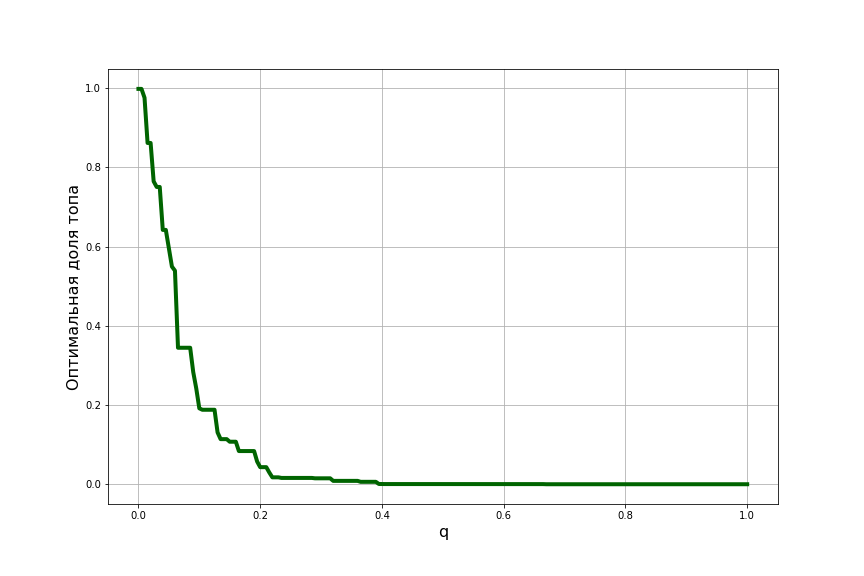

Какой же экономический эффект от нашей модели? Он тоже зависит от q. Ниже представлен график процента увеличения выручки от применения модели

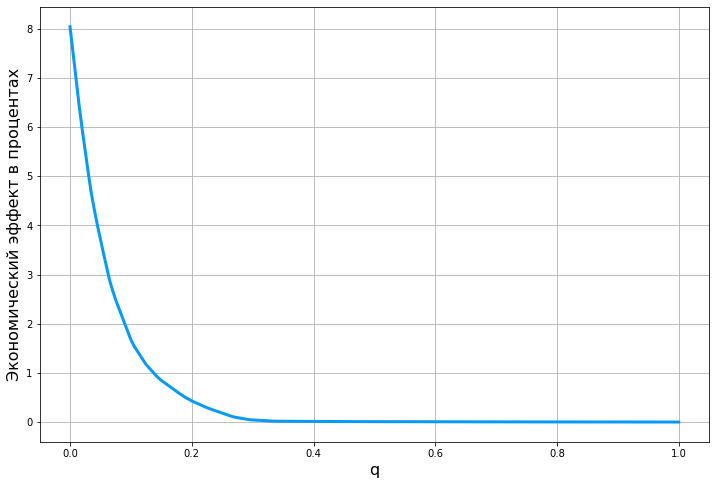

Нужно ли улучшение модели? Посмотрим на график улучшения экономического эффекта в зависимоcти от q.

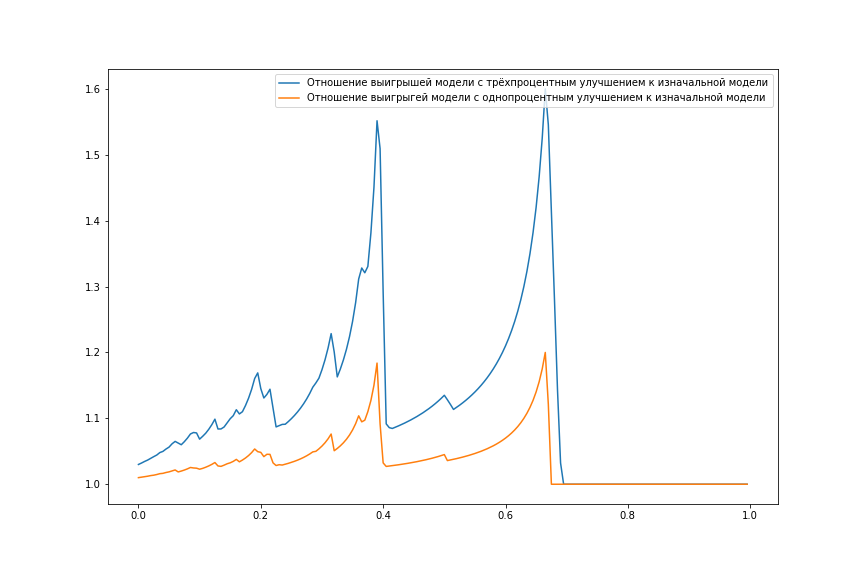

Мы видим, что улучшение не является приоритетной задачей при маленьких значенииях коэффициента q, но улучшение модели может помочь, когда q лишь в несколько раз меньше единицы.

Однако, по графикам выше, видно, что модель в гораздо большей степени зависит от q, нежели от дополнительных процентов в обучении модели. В конце концов при q = 1 даже самая точная модель не поможет, но при q стремящимся к нулю, улучшение финансовой выгоды будет также достигать тех же самых процентов. В то время, как снижение q на несколько процентов в околонулевой зоне принесёт гораздо больше выгоды в процентах.

Применение модели является экономически оправданным, так как классы отток - не отток не сбалансированы, а это значит, что выбирать отточных пользователей рандомом - плохая идея, такой подход обладает плохой точностью (меньше 10 процентов). А это значит, что модель с 60% точности будет более, чем в шесть раз лучше (на 500 процентов).

# 4. Описание модели

Давайте перейдём к техническим деталям. Чтобы уж слишком не разливаться мыслью по древу, опишем лишь этапы построения модели.
1. Неизвестные числовые данные были заменены на средние значения. Это позволяет не учитывать эти данные, так как нормализованные числовые данные, приводят к тому, что средние значения обращаются в ноль.
2. Неизвестные категориальные данные были заменены на новую "категорию"
3. Часть признаков была отброшена, так как содержали уж слишком много пропусков.
4. Часть признаков была отброшена, с помощью отбора признаков по степени их важности.
5. На дефолтных настройках наконец строится модель на основе классификатора из кэтбуста.

Данная модель позволила набрать 0.7311 на тестовых данных по метрике ROC-AUC. Обратим внимание, что наиболее важным этапом является отбор признаков, так как модель catboost отлично справляется со всем остальным.

Результат на кэггле (на момент 30 апреля 2021 года, наивысшее качество было достигнуто за 22 попытки):

https://www.kaggle.com/c/telecom-clients-prediction2/leaderboard

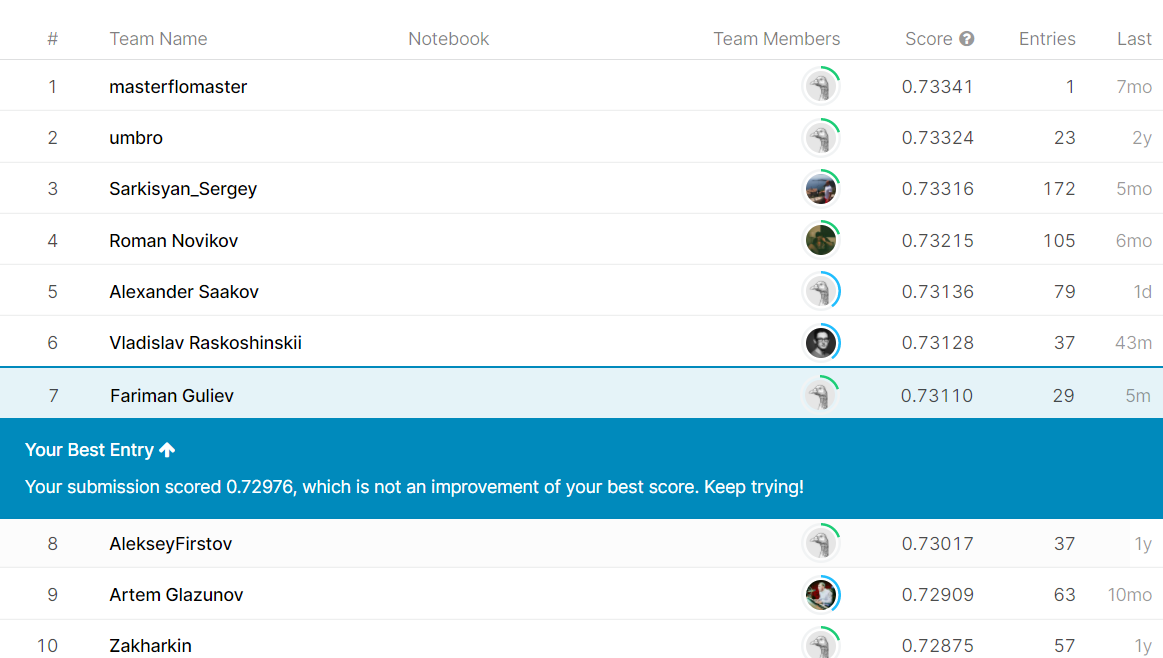

#### В файле model.ipynb можно найти код построенной модели

# 5. Итоги

В нашей работе мы смогли построить модель, которая сможет решать задачу оттока. Причём, мы также смогли найти экономическое решение, которое обеспечит наилучший результат на основе данных о коэффициенте q. Модель возможно можно улучшить ещё, попробовав дополнительные методы отбора.

# 6. Предложения по внедрению модели

Класс отток составляет примерно 7.5 процентов судя по тем данным, что у нас есть. Чтобы получить репрезентативную выборку для тестирования стратегии выигрыша нам надо взять такое количество данных, чтобы сузить отклонение до скажем пяти процентов от 0.075.

Достаточно вспомнить формулу отклонения для доли, получим следующие вычисления

$$ n = \frac{0.075 * 0.925}{(0.075 * 0.05)^2}=\frac{0.925}{0.075 * 0.0025}\approx 5000$$

Если же мы захотим сузить двойное отклонение до пяти процентов, то количество данных, которые нам будут нужны для тестирования, будет составлять 20000

На двух выборках такого размера можно будет проверить, как будет вести себя модель при известном q, и действительно ли результат будет выше, чем на ожидаемом улучшении качества или же нет.